In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mat50 = np.load('np/mat50.npy')
mat100 = np.load('np/mat100.npy')
mat200 = np.load('np/mat200.npy')

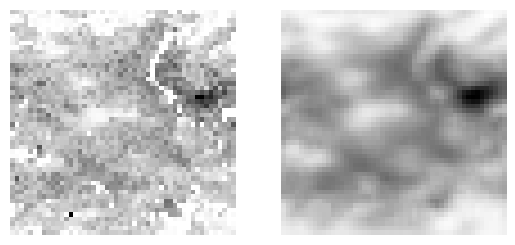

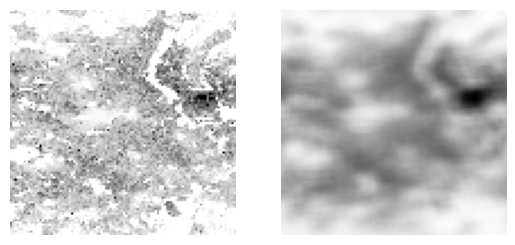

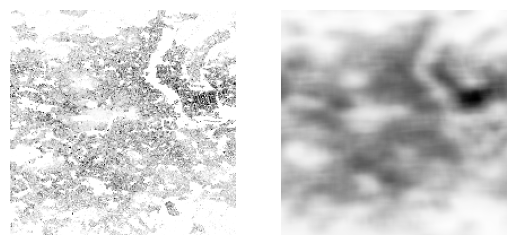

In [130]:
def smooth(mat, matsize, deg=2):
    smoothed = np.copy(mat)
    for i in range(matsize):
        for j in range(matsize):
            xr = np.r_[i - deg : i + deg + 1] % matsize
            xc = np.r_[j - deg : j + deg + 1] % matsize
            smoothed[i, j] = np.mean(smoothed[np.ix_(xr, xc)])
    return smoothed

def side2side(mat, matsize, deg=2):
    smoothed = smooth(mat, matsize, deg)

    fig, ax = plt.subplots(1, 2)
    matrices = [mat, smoothed]
    for i in range(2):
        ax[i].imshow(matrices[i], cmap='Greys')
        ax[i].axis('off')
    plt.show()

    return smoothed

sm50 = side2side(mat50, 50)
sm100 = side2side(mat100, 100, deg=4)
sm200 = side2side(mat200, 200, deg=8)

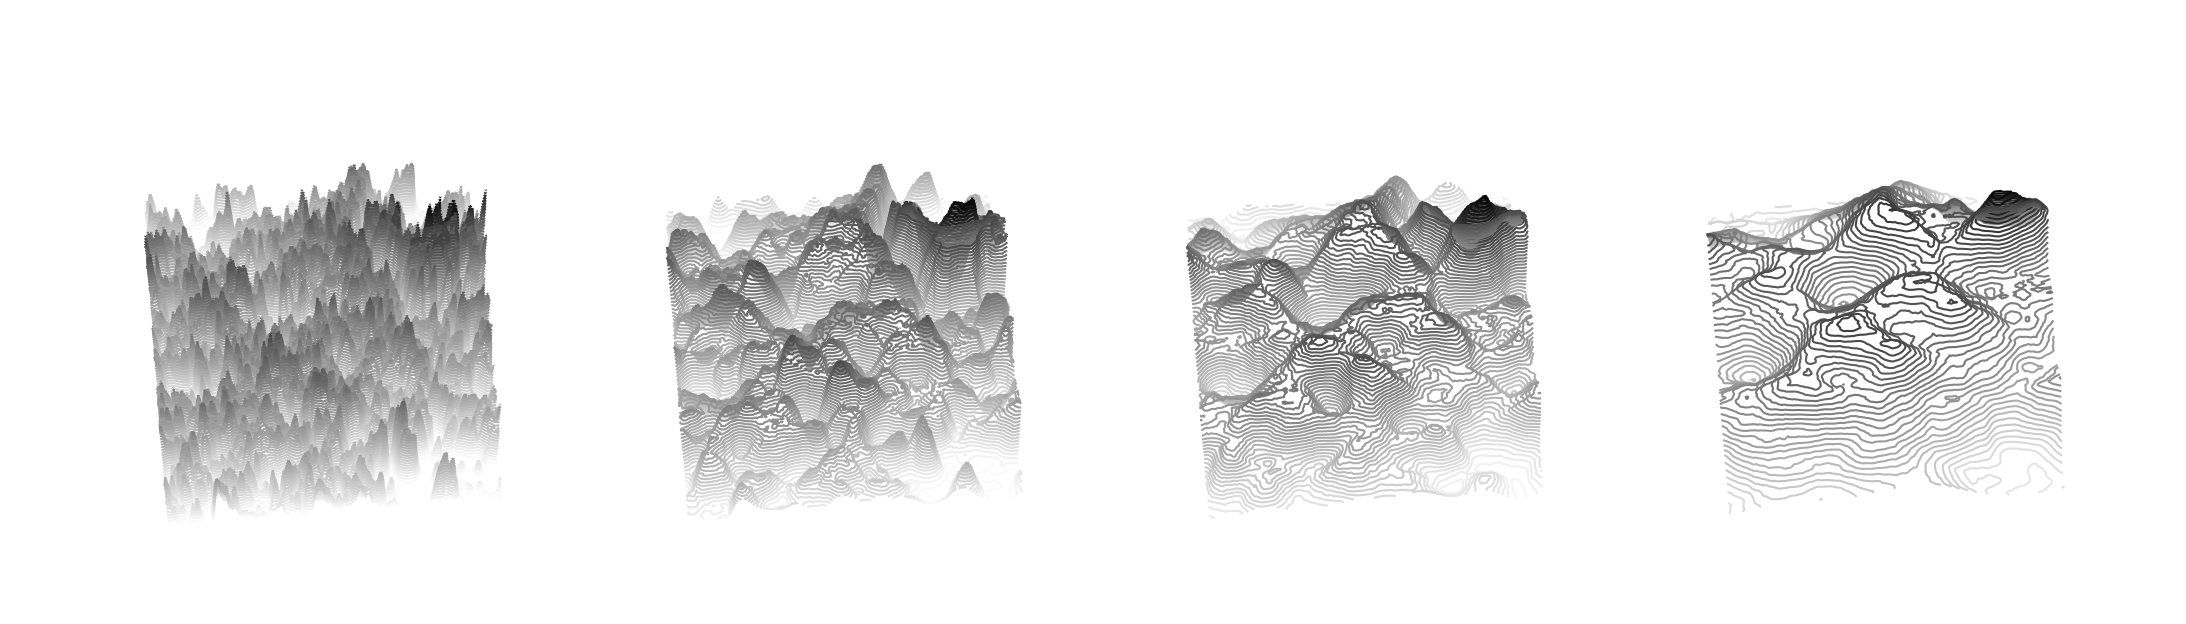

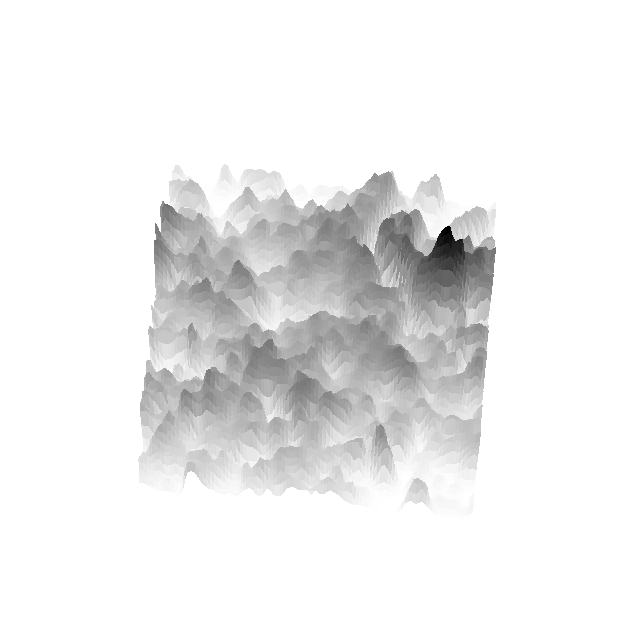

In [131]:
def threedim(matx, deg1, deg2, n=1, surface=False):
    size = matx.shape[0]
    x = y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(20, 20))
    ax = {}
    for i in range(1, n+1):
        mat = smooth(matx, size, i**2)
        ax[i] = fig.add_subplot(1, 4, i, projection='3d')
        if surface:
            ax[i].plot_surface(-X, Y, mat, rstride=1, cstride=1, cmap='Greys', linewidth=0, antialiased=False)
        else:
            ax[i].contour3D(-X, Y, mat, 50, cmap='binary')
        ax[i].view_init(deg1, deg2)
        plt.axis('off')
    fig.tight_layout(pad=-6)
    # fig.savefig(f'plots/threex{size}{n}')
    plt.show()


threedim(mat200, 65, 85, 4)
threedim(mat100, 70, 95, surface=True)

(79, 173)
(179, 273) (400, 400)
0


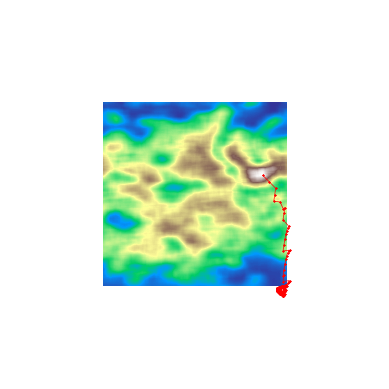

In [215]:
# FIX for steps larger than 1
def next(mat, index, step=1):
    i, j = index
    xr = np.r_[i - step : i + step + 1]
    xc = np.r_[j - step : j + step + 1]
    argmin = np.argmin(mat[np.ix_(xr, xc)])
    x = argmin % (step*2 + 1) - 1
    y = argmin // (step*2 + 1) - 1
    return (x + i, y + j)


# matthew = np.array([[10, 20, 30], [40, 5, np.nan], [70, 8, 9]])
# print(np.nanargmin(matthew))
def descent(mat, start_ids, step=1):
    old_idx = start_ids
    ids_list = [start_ids]
    n_steps = 0
    for i in range(1, 300):
        new_idx = next(mat, old_idx, step)
        if new_idx == old_idx:
            n_steps = i
            break
        ids_list.append(new_idx)
        old_idx = new_idx
    return ids_list, n_steps

def buffer(mat, deg=100):
    buffered = np.copy(mat)
    def pad_with(vector, pad_width, iaxis, kwargs):
        pad_value = kwargs.get('padder', 10)
        vector[:pad_width[0]] = pad_value
        vector[-pad_width[1]:] = pad_value
    return np.pad(buffered, deg, pad_with, padder=float('-inf')), deg
    

def plot_descent(smx):   
    idx = np.unravel_index(np.nanargmax(smx), smx.shape)
    print(idx)
    mat, deg = buffer(smx)
    idx = idx[0] + deg, idx[1] + deg
    print(idx, mat.shape)
    ids_list, n_steps = descent(mat, idx, step=4)
    print(n_steps)
    x, y = zip(*ids_list)
    plt.imshow(mat, origin='upper', cmap='terrain')
    plt.plot(y, x, '-x', markersize=1, linewidth=0.5, c='r')
    plt.axis('off')
    plt.show()

plot_descent(sm200)
